# Banking and Unemployment
---
The below script explores the relationship between states with high unemployment rates and bank counts per state.

In this script, we retrieved and plotted data from the 2013 US Census and Google Places API to show the relationship between various socioeconomic parameters and bank count across 700 randomly selected zip codes. We used Pandas, Numpy, Matplotlib, Requests, Census API, and Google API to accomplish our task.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
from census import Census
from us import states

# census key
from config import census_key

# Census API Key
c = Census(census_key, year=2013)

## Data Retrieval

In [2]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("B01003_001E", "B23025_005E"), {
                         'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B23025_005E": "Unemployment Count",
                                      "zip code tabulation area": "Zipcode"})

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Unemployment Rate"]]

# Visualize
print(len(census_pd))
census_pd.head()

33120


,Zipcode,Population,Unemployment Rate
0,00601,18450.0,7.934959
1,00602,41302.0,11.541814
2,00603,53683.0,8.086359
3,00606,6591.0,2.033075
4,00610,28963.0,3.915340


## Combine Data

In [3]:
# Import the original data we analyzed earlier. Use dtype="object" to match other
census_data_original = pd.read_csv(
    "zip_bank_data.csv", dtype="object", encoding="utf-8")

# Visualize
census_data_original.head()

,Zipcode,Address,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Lat,Lng,Bank Count
0,49058,"Hastings, MI 49058, USA",19031,40.8,46777,22137,13.18375282,42.6306916,-85.2929384,9
1,71405,"Ball, LA 71405, USA",5687,35.8,55242,23941,15.73764727,31.4061799,-92.396174,12
2,20634,"Great Mills, MD 20634, USA",6562,31.9,79944,35961,9.295946358,38.2201614,-76.4967919,9
3,38487,"Williamsport, TN 38487, USA",762,41.6,38125,18884,24.40944882,35.7310368,-87.2419299,0
4,58466,"Marion, ND 58466, USA",509,44.5,69844,36981,9.430255403,46.5594224,-98.3481542,1


In [4]:
# Merge the two data sets along zip code
census_data_complete = pd.merge(
    census_data_original, census_pd, how="left", on=["Zipcode", "Zipcode"])

# Save the revised Data Frame as a csv
census_data_complete.to_csv(
    "bank_data_with_employment.csv", encoding="utf-8", index=False)

# Visualize
census_data_complete.head()

,Zipcode,Address,Population_x,Median Age,Household Income,Per Capita Income,Poverty Rate,Lat,Lng,Bank Count,Population_y,Unemployment Rate
0,49058,"Hastings, MI 49058, USA",19031,40.8,46777,22137,13.18375282,42.6306916,-85.2929384,9,19031.0,5.312385
1,71405,"Ball, LA 71405, USA",5687,35.8,55242,23941,15.73764727,31.4061799,-92.396174,12,5687.0,4.571830
2,20634,"Great Mills, MD 20634, USA",6562,31.9,79944,35961,9.295946358,38.2201614,-76.4967919,9,6562.0,4.053642
3,38487,"Williamsport, TN 38487, USA",762,41.6,38125,18884,24.40944882,35.7310368,-87.2419299,0,762.0,10.236220
4,58466,"Marion, ND 58466, USA",509,44.5,69844,36981,9.430255403,46.5594224,-98.3481542,1,509.0,1.178782


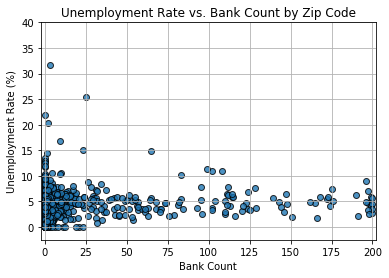

In [5]:
# Build a scatter plot for each data type
plt.scatter(census_data_complete["Bank Count"].astype(int),
            census_data_complete["Unemployment Rate"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("Unemployment Rate vs. Bank Count by Zip Code")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Bank Count")
plt.grid(True)
plt.xlim([-2.5, 202])
plt.ylim([-2.5, 40])

# Save the figure
plt.savefig("UnemploymentRate_BankCount.png")

# Show plot
plt.show()